**Name** : Aditya Pulikal \
**Qualification** : MSc Data Science and AI \
**Project Name** : Used Cars Cost Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
df = pd.read_csv("audi.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


# EDA

In [3]:
#check for null values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
#check for duplicate values
df.duplicated().sum() #103 dups
df.drop_duplicates(inplace = True)
df.duplicated().sum() #now 0 dups

0

In [5]:
#checking col dtypes
print(df.dtypes)
#descrobe data
df.describe().T

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
year,10565.0,2017.084524,2.167309,1997.0,2016.0,2017.0,2019.0,2020.0
price,10565.0,22853.956081,11723.076767,1490.0,15000.0,20000.0,27990.0,145000.0
mileage,10565.0,24955.960530,23448.942551,1.0,6000.0,19268.0,36668.0,323000.0
tax,10565.0,125.909134,67.408761,0.0,125.0,145.0,145.0,580.0
mpg,10565.0,50.837558,12.963337,18.9,40.9,49.6,58.9,188.3
engineSize,10565.0,1.932977,0.602902,0.0,1.5,2.0,2.0,6.3


In [6]:
df['transmission'].value_counts()

transmission
Manual       4317
Semi-Auto    3568
Automatic    2680
Name: count, dtype: int64

D:\AnacondaFiles\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


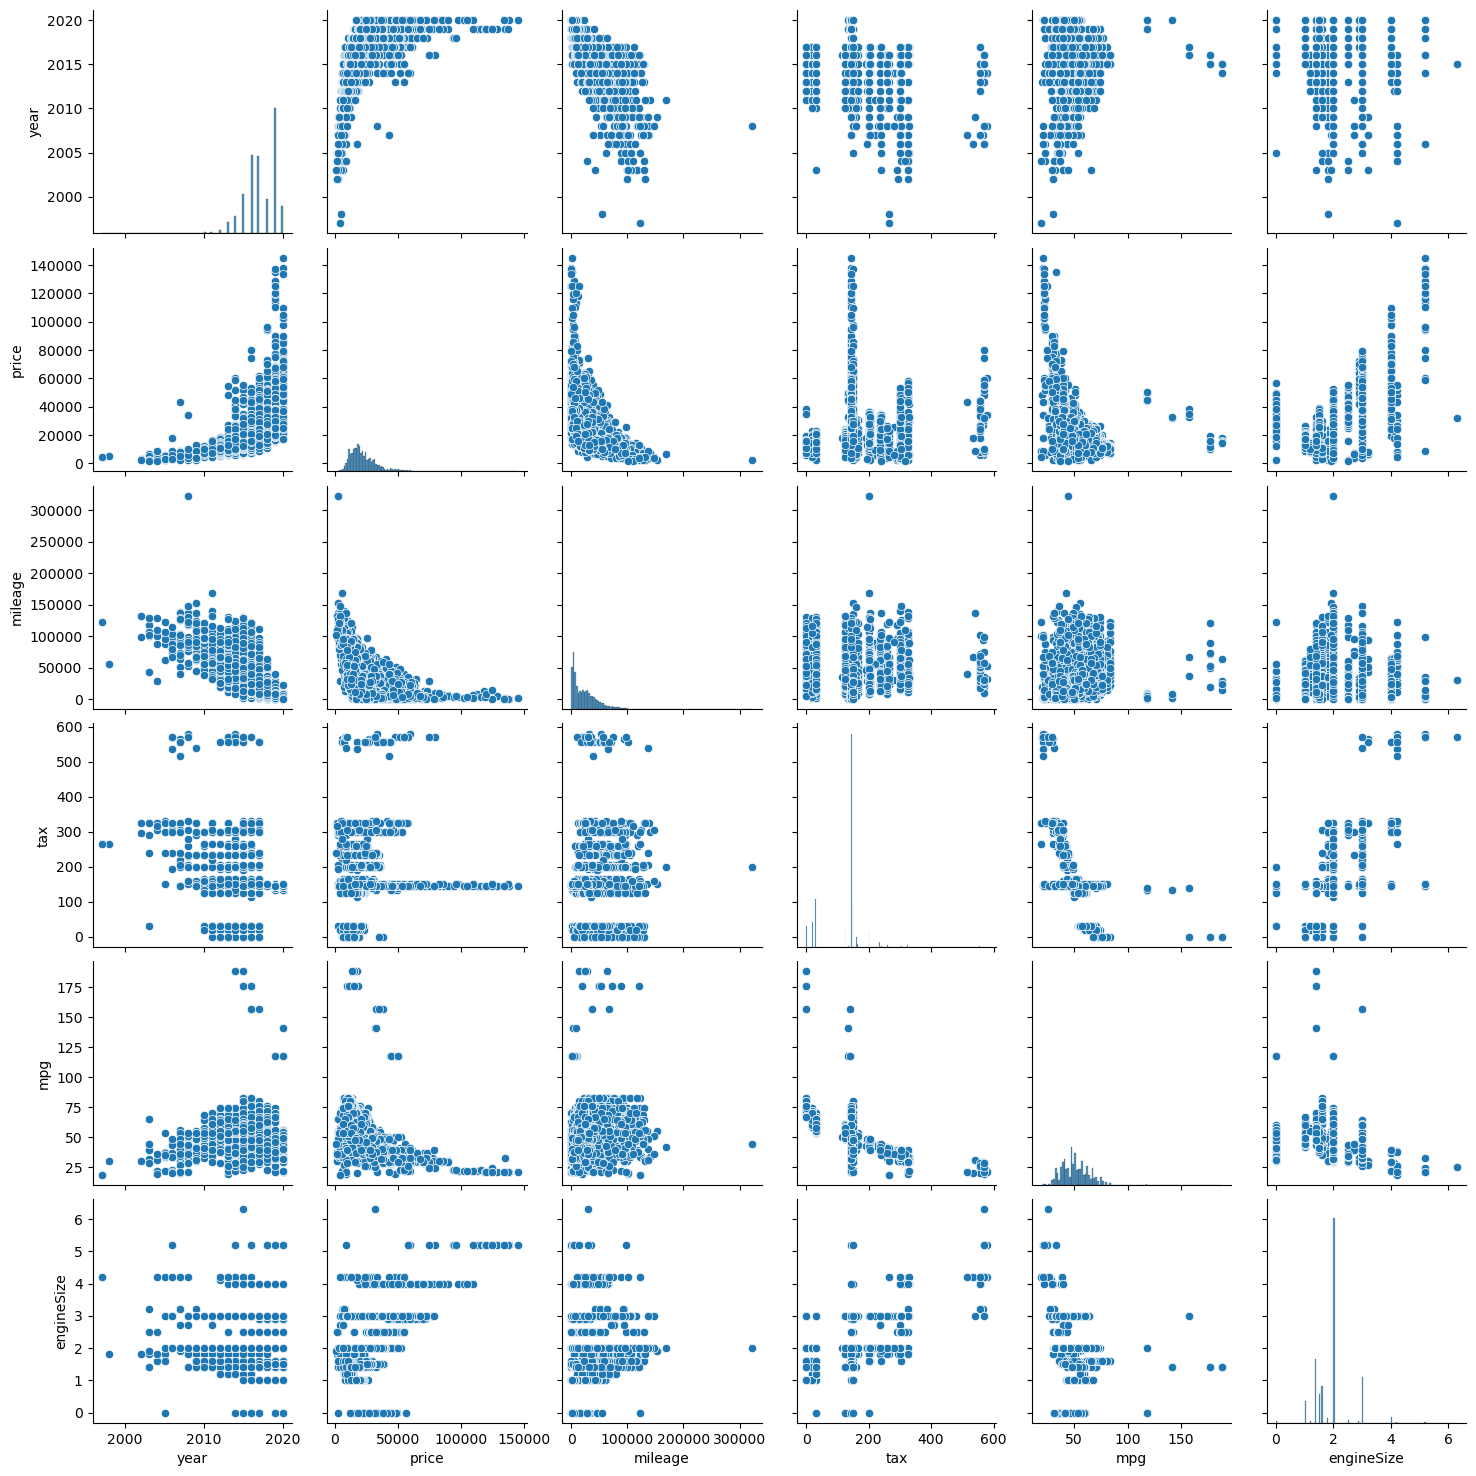

In [7]:
#outlier detection
sns.pairplot(df)
plt.show()

In [8]:
cleaned_df = df.copy()
#removing outliers
# sns.boxplot(x = "year", y = "mpg",data = df)
plt.show()
cleaned_df = cleaned_df[(cleaned_df["mpg"]<100)]

D:\AnacondaFiles\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


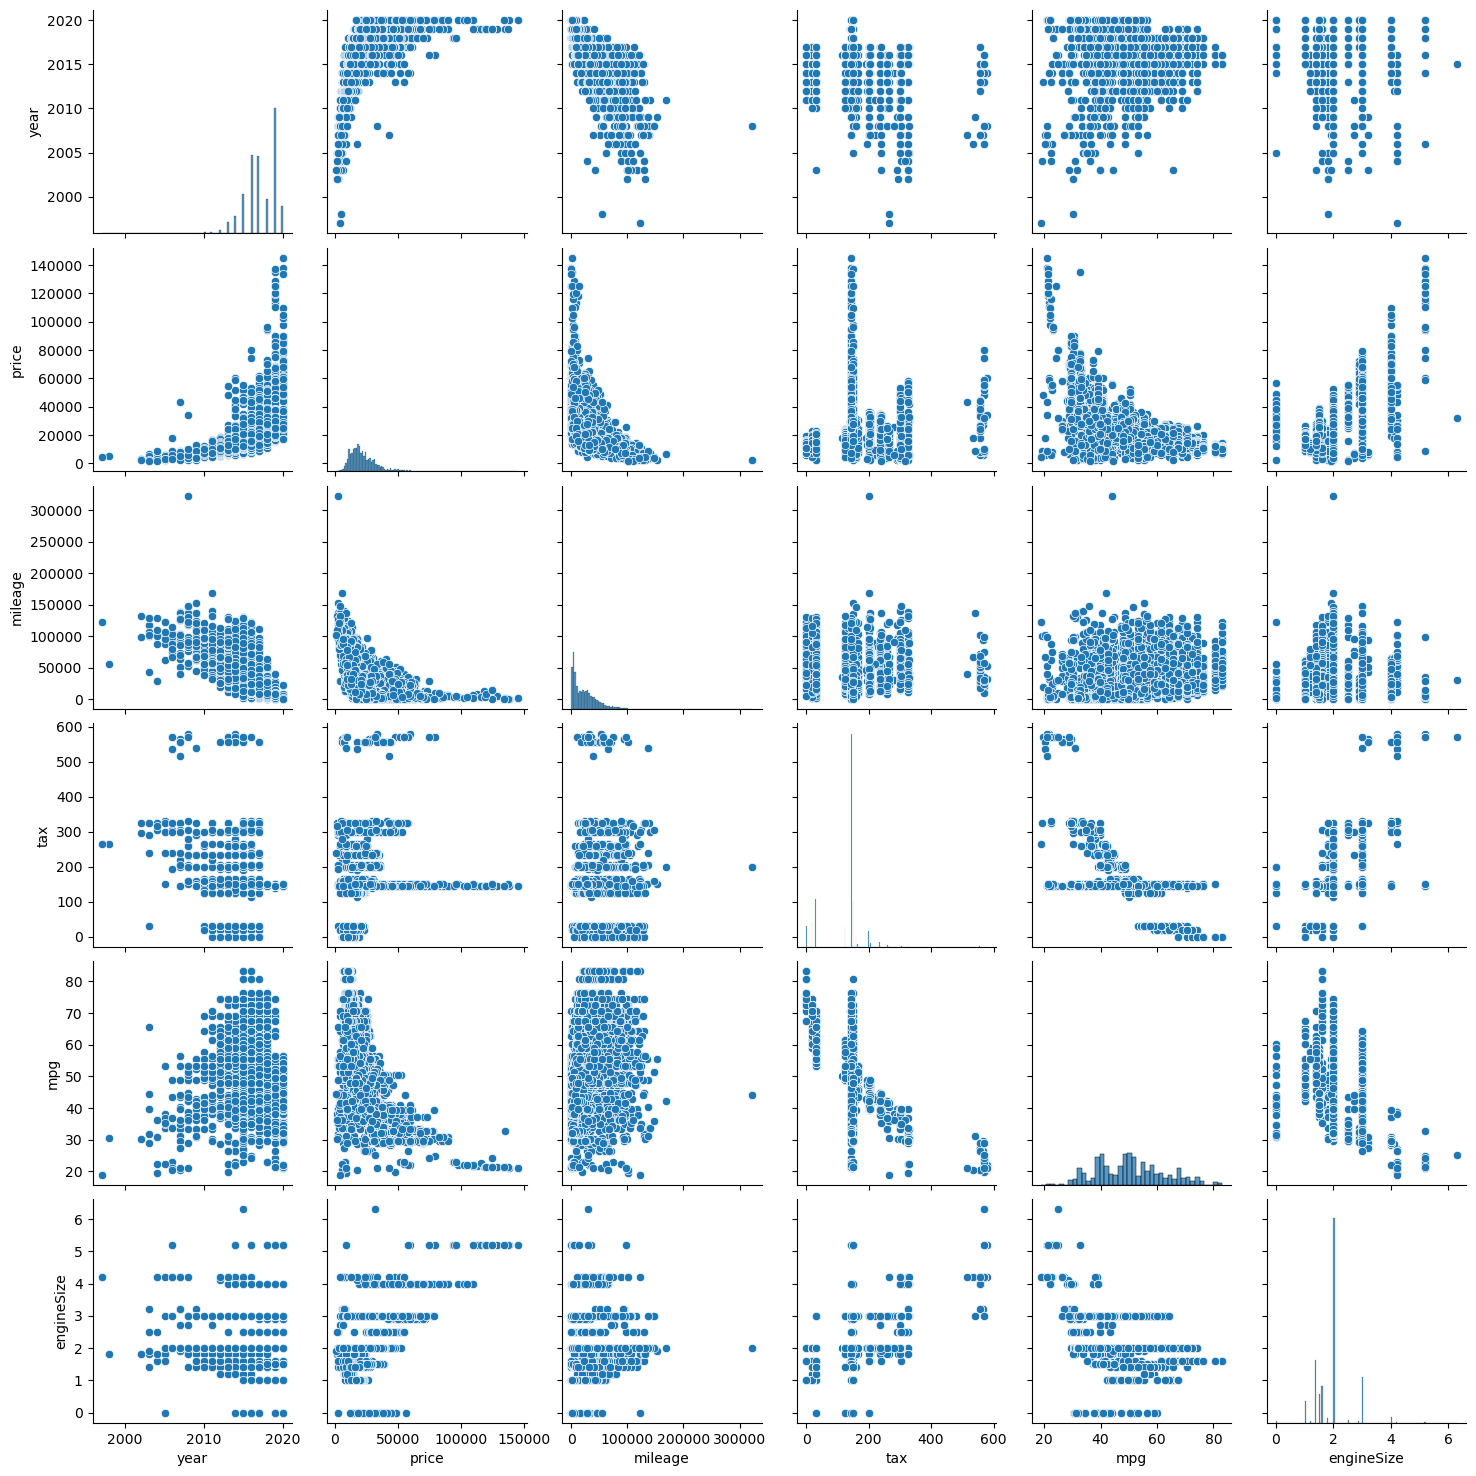

In [9]:
sns.pairplot(cleaned_df)
plt.show()

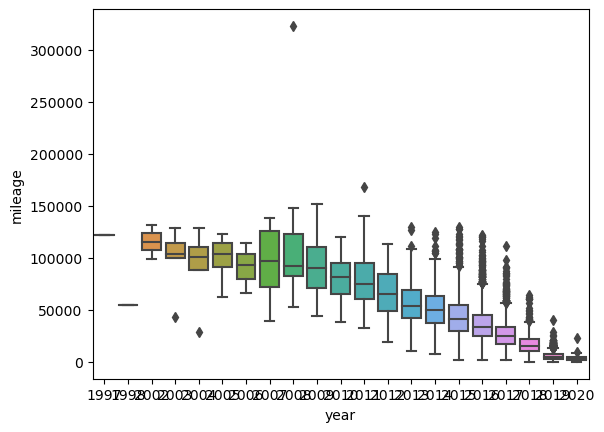

In [10]:
sns.boxplot(x = "year", y = "mileage",data = cleaned_df)
plt.show()
cleaned_df = cleaned_df[(cleaned_df["mileage"]<200000)]

D:\AnacondaFiles\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


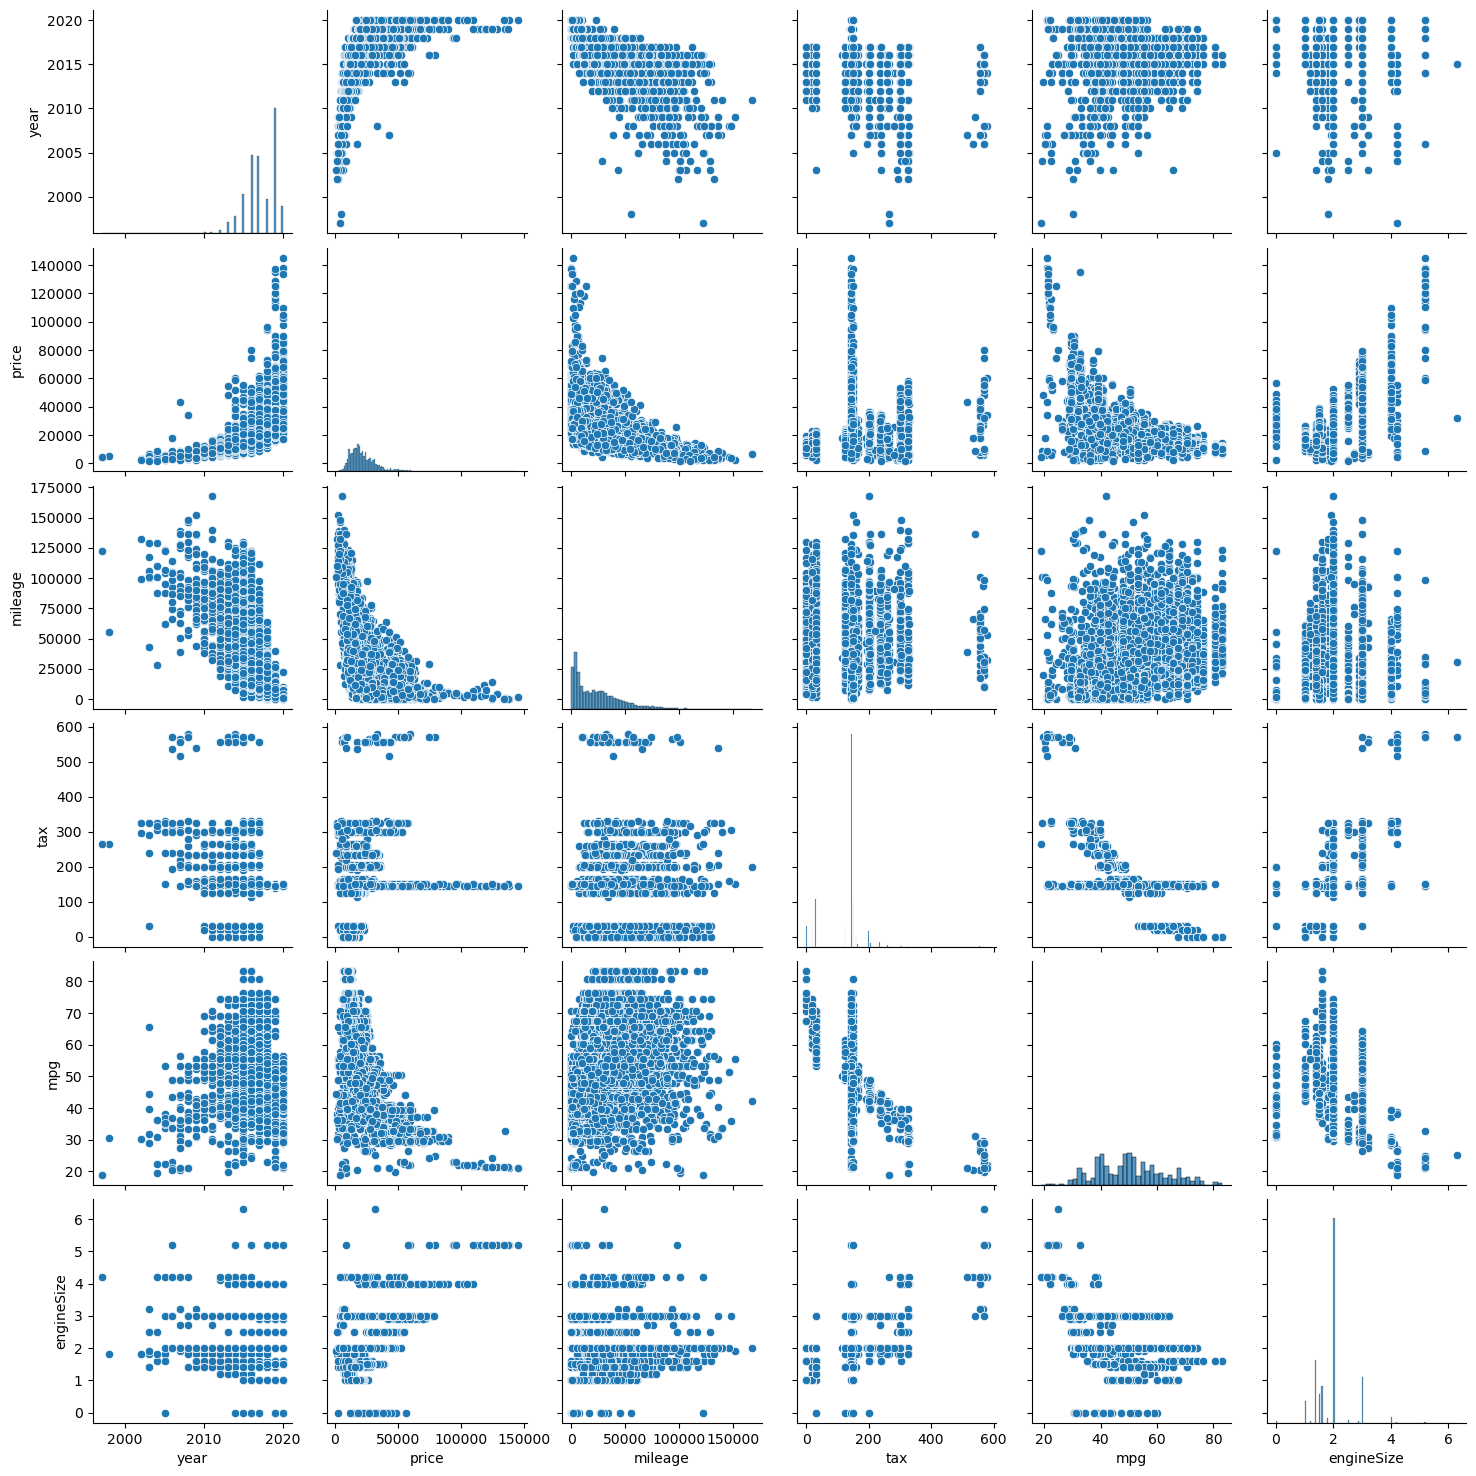

In [11]:
sns.pairplot(cleaned_df)
plt.show()

# Model building prerequisites

In [15]:
# cleaned_df
x = cleaned_df.drop(['price'],axis = 1)
y = cleaned_df['price']
print(x)
print(y)

      model  year transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...          ...      ...      ...  ...   ...         ...
10663    A3  2020       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016       Manual    11855   Petrol  150  47.9         1.4

[10531 rows x 8 columns]
0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
10663    16999
10664

In [21]:
#encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['transmission'] = le.fit_transform(x['transmission'])
x['fuelType'] = le.fit_transform(x['fuelType'])
x['model'] = le.fit_transform(x['model'])
print(x)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          0  2017             1    15735         1  150  55.4         1.4
1          5  2016             0    36203         0   20  64.2         2.0
2          0  2016             1    29946         1   30  55.4         1.4
3          3  2017             0    25952         0  145  67.3         2.0
4          2  2019             1     1998         1  145  49.6         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
10663      2  2020             1     4018         1  145  49.6         1.0
10664      2  2020             1     1978         1  150  49.6         1.0
10665      2  2020             1      609         1  150  49.6         1.0
10666      9  2017             0     8646         1  150  47.9         1.4
10667      9  2016             1    11855         1  150  47.9         1.4

[10531 rows x 8 columns]


In [22]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.11820925 -0.03881037 -0.11030479 ...  0.35542741  0.41663082
  -0.88635672]
 [-0.15835616 -0.50063181 -1.41990989 ... -1.57502878  1.1702122
   0.1097364 ]
 [-1.11820925 -0.50063181 -0.11030479 ... -1.42653215  0.41663082
  -0.88635672]
 ...
 [-0.73426802  1.34665397 -0.11030479 ...  0.35542741 -0.08004781
  -1.5504188 ]
 [ 0.60952631 -0.03881037 -1.41990989 ...  0.35542741 -0.22562603
  -0.88635672]
 [ 0.60952631 -0.50063181 -0.11030479 ...  0.35542741 -0.22562603
  -0.88635672]]


In [25]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)
print(x_train.shape)
print(y_train.shape)

(8424, 8)
(8424,)


# Models 

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_training = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print("Training acc:",round(r2_score(y_train,y_pred_training)*100,4))
print("Testing acc:",round(r2_score(y_test,y_pred_test)*100,4)) #accs bw train and test should not differ by 5% else model is overfitting

Training acc: 81.9032
Testing acc: 80.0583


In [38]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_training = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print("Training acc:",round(r2_score(y_train,y_pred_training)*100,4))
print("Testing acc:",round(r2_score(y_test,y_pred_test)*100,4))

Training acc: 99.3391
Testing acc: 96.1607


In [39]:
# !pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.1 MB 10.7 MB/s eta 0:00:10
   ---------------------------------------- 1.1/101.1 MB 12.0 MB/s eta 0:00:09
    --------------------------------------- 1.4/101.1 MB 9.5 MB/s eta 0:00:11
    --------------------------------------- 1.8/101.1 MB 9.6 MB/s eta 0:00:11
    --------------------------------------- 2.1/101.1 MB 9.0 MB/s eta 0:00:11
    --------------------------------------- 2.4

In [41]:
#Catboost Regressor
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(x_train,y_train)
y_pred_training = cat.predict(x_train)
y_pred_test = cat.predict(x_test)
print("Training acc:",round(r2_score(y_train,y_pred_training)*100,4))
print("Testing acc:",round(r2_score(y_test,y_pred_test)*100,4))

Learning rate set to 0.057334
0:	learn: 11103.5022743	total: 152ms	remaining: 2m 31s
1:	learn: 10627.1725884	total: 156ms	remaining: 1m 17s
2:	learn: 10178.3769281	total: 160ms	remaining: 53.2s
3:	learn: 9747.2069195	total: 164ms	remaining: 40.9s
4:	learn: 9362.2857744	total: 167ms	remaining: 33.3s
5:	learn: 8985.0761445	total: 170ms	remaining: 28.2s
6:	learn: 8650.5545014	total: 172ms	remaining: 24.4s
7:	learn: 8300.6498616	total: 174ms	remaining: 21.6s
8:	learn: 7958.3266206	total: 176ms	remaining: 19.4s
9:	learn: 7671.4701843	total: 178ms	remaining: 17.7s
10:	learn: 7383.0350716	total: 180ms	remaining: 16.2s
11:	learn: 7100.2187139	total: 182ms	remaining: 15s
12:	learn: 6861.3246424	total: 183ms	remaining: 13.9s
13:	learn: 6618.4746482	total: 185ms	remaining: 13s
14:	learn: 6403.2710444	total: 186ms	remaining: 12.2s
15:	learn: 6200.1450246	total: 187ms	remaining: 11.5s
16:	learn: 6000.2183307	total: 189ms	remaining: 10.9s
17:	learn: 5815.4951563	total: 190ms	remaining: 10.4s
18:	lea

# Since the testing acc of catboost is the highest 96.4856%, we select this as our best model

In [44]:
#pickle
import pickle
pickle.dump(cat, open('model.pkl','wb'))

In [48]:
model=pickle.load(open('model.pkl','rb'))
print (model.predict (x_train))

[21039.80480578 49485.10648698 22993.22148751 ... 16240.15076494
 30292.35030619 26235.82845735]
